In [1]:
## Specify name and directory path of GSEA running sums CSV file
## that was generated by GSEA_from_featureCounts
res_csv_directory = "C:/Users/jscurll/Documents/Jupyter/jupyter/Bioinformatics/RNA-seq/Testing/GSEA/42D-1894_vs_NCIH660-1894/KEGG_2019_Human_genesets/Using_Median_norm"
res_csv_filename = "gsea_running_sums.csv"

## Specify gene sets to overlay running sums for.
### This can specified in two possible formats:
### 1) A positive integer, N. This will plot the top N gene sets.
###       e.g. gene_sets_to_plot = 5
### 2) A list of gene set names.
###       e.g. gene_sets_to_plot = ["ABC transporters", "AMPK signaling pathway", "mRNA surveillance pathway", "p53 signaling pathway"]
###
gene_sets_to_plot = 5

In [2]:
## IMPORT PYTHON LIBRARIES/MODULES
import os
from pathlib import Path
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt

In [3]:
## Ensure correct interpretation of path by OS (e.g. on Windows)
res_csv_directory = Path(res_csv_directory)
res_csv_fullpath = os.path.join(res_csv_directory,res_csv_filename)

## Load running sums from CSV into dataframe
res = pd.read_csv(res_csv_fullpath)
res.head()

Gene     Change  Rank  ABC transporters_RES  \
0  PRAC1  13.373044     0             -0.000025   
1  FOLH1  12.526782     1             -0.000050   
2   BEX1  11.917329     2             -0.000075   
3  LDOC1  11.366239     3             -0.000100   
4   LY6E  10.887162     4             -0.000125   

   AGE-RAGE signaling pathway in diabetic complications_RES  \
0                                          -0.000025          
1                                          -0.000050          
2                                          -0.000075          
3                                          -0.000100          
4                                          -0.000125          

   AMPK signaling pathway_RES  Acute myeloid leukemia_RES  \
0                   -0.000025                   -0.000025   
1                   -0.000050                   -0.000050   
2                   -0.000075                   -0.000075   
3                   -0.000100                   -0.000100   
4                   -0.000125                   -0.000125   

   Adherens junction_RES  Adipocytokine signaling pathway_RES  \
0              -0.000025                            -0.000025   
1              -0.000050                            -0.000050   
2              -0.000075                            -0.000075   
3              -0.000100                            -0.000100   
4              -0.000125                            -0.000125   

   Adrenergic signaling in cardiomyocytes_RES  ...  Vitamin B6 metabolism_RES  \
0                                   -0.000025  ...                  -0.000025   
1                                   -0.000050  ...                  -0.000050   
2                                   -0.000075  ...                  -0.000075   
3                                   -0.000100  ...                  -0.000100   
4                                   -0.000125  ...                  -0.000125   

   Vitamin digestion and absorption_RES  Wnt signaling pathway_RES  \
0                             -0.000025                  -0.000025   
1                              0.272472                  -0.000050   
2                              0.272447                  -0.000075   
3                              0.272422                  -0.000100   
4                              0.272397                  -0.000125   

   alpha-Linolenic acid metabolism_RES  beta-Alanine metabolism_RES  \
0                            -0.000025                    -0.000025   
1                            -0.000050                    -0.000050   
2                            -0.000075                    -0.000075   
3                            -0.000100                    -0.000100   
4                            -0.000125                    -0.000125   

   cAMP signaling pathway_RES  cGMP-PKG signaling pathway_RES  \
0                   -0.000025                       -0.000025   
1                   -0.000050                       -0.000050   
2                   -0.000075                       -0.000075   
3                   -0.000100                       -0.000100   
4                   -0.000125                       -0.000125   

   mRNA surveillance pathway_RES  mTOR signaling pathway_RES  \
0                      -0.000025                   -0.000025   
1                      -0.000050                   -0.000050   
2                      -0.000075                   -0.000075   
3                      -0.000100                   -0.000100   
4                      -0.000125                   -0.000125   

   p53 signaling pathway_RES  
0                  -0.000025  
1                  -0.000050  
2                  -0.000075  
3                  -0.000100  
4                  -0.000125  

[5 rows x 307 columns]

In [4]:
if type(gene_sets_to_plot)==int:
    ## Load gene_set_report.csv file generated by GSEAPY
    gs_report_csv = os.path.join(res_csv_directory,"gseapy.gsea.gene_set.report.csv")
    gs_report = pd.read_csv(gs_report_csv)
    ## Get the names of the top-ranked gene sets
    gene_sets_to_plot = gs_report["Term"][:gene_sets_to_plot]

## Get the column names from res that most closely match
## the list of names of gene sets to plot
col_names = list(res.columns)
gene_sets_to_plot = list(gene_sets_to_plot)
print("Specified gene sets \n" + str(gene_sets_to_plot))
for i in range(len(gene_sets_to_plot)):
    gene_sets_to_plot[i] = difflib.get_close_matches(gene_sets_to_plot[i],col_names,n=1)[0]
print("Plotting \n" + str(gene_sets_to_plot))

Specified gene sets 
['Cell cycle', 'Endocytosis', 'Herpes simplex virus 1 infection', 'Spliceosome', 'Epstein-Barr virus infection']
Plotting 
['Cell cycle_RES', 'Endocytosis_RES', 'Herpes simplex virus 1 infection_RES', 'Spliceosome_RES', 'Epstein-Barr virus infection_RES']


c:\users\jscurll\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


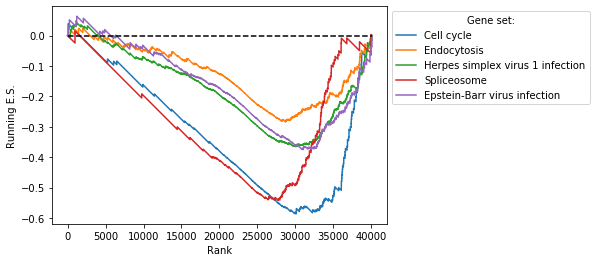

In [5]:
## PLOTTING
for gs in gene_sets_to_plot:
    plt.plot(res['Rank'],res[gs],label=gs.split('_RES')[0])
plt.plot([0,res['Rank'].max()],[0,0],'--k')
plt.xlabel("Rank")
plt.ylabel("Running E.S.")
plt.legend(title="Gene set:",bbox_to_anchor=(1,1))
plt.show()

In [10]:
plt.clf

<function matplotlib.pyplot.clf()>